In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scout import io
from scout import utils
from scout import plot

In [27]:
%matplotlib notebook

In [140]:
working_dir = '/media/jswaney/Drive/Justin/organoid_phenotyping/datasets/d35_wt/20190419_14_35_07_AA_org1_488LP13_561LP120_642LP60/'
# working_dir = '/media/jswaney/Drive/Justin/organoid_phenotyping/datasets/d35_wt/20190419_15_50_16_AA_org2_488LP13_561LP120_642LP60/'
# working_dir = '/media/jswaney/Drive/Justin/organoid_phenotyping/datasets/d35_wt/20190419_16_09_03_AA_org3_488LP13_561LP120_642LP60/'
# working_dir = '/media/jswaney/Drive/Justin/organoid_phenotyping/datasets/d35_wt/20190430_11_36_09_AA-4.30.19-org1_488LP12p5_561LP120_642LP50/'
# working_dir = '/media/jswaney/Drive/Justin/new_org_datasets/20190430_13_37_55_AA-4.30.19-org2_488LP13_561LP120_642LP50/'
# working_dir = '/media/jswaney/Drive/Justin/organoid_phenotyping/datasets/d35_wt/20190430_15_06_10_AA-4.30.19-org3_488LP13_561LP120_642LP50/'
# working_dir = '/media/jswaney/Drive/Justin/new_org_datasets/20190430_15_52_14_AA-4.30.19-org4_488LP13_561LP120_642LP50/'
# working_dir = '/media/jswaney/Drive/Justin/organoid_phenotyping/datasets/d60_wt/20190509_16_55_31_AA-orgs5.8.19_org1_488LP15_561LP140_642LP50/'
# working_dir = '/media/jswaney/Drive/Justin/new_org_datasets/20190509_18_27_47_AA-orgs5.8.19_org2_488LP14_561LP140_642LP50/'
# working_dir = '/media/jswaney/Drive/Justin/new_org_datasets/20190509_18_44_18_AA-orgs5.8.19_org3_488LP17_561LP140_642LP60/'
# working_dir = '/media/jswaney/Drive/Justin/new_org_datasets/20190509_19_15_27_AA-orgs5.8.19_org5_488LP16_561LP160_642LP60/'
os.listdir(working_dir)

['niche_proximities.npy',
 '.ipynb_checkpoints',
 'centroids.npy',
 'centroids_um.npy',
 'Combine_organoids.ipynb',
 'Combine_organoids_cytoarchitectures.ipynb',
 'Convert centroids to centroids_um.ipynb',
 'cyto_labels.npy',
 'cyto_labels_sample.npy',
 'cyto_profiles.npy',
 'cyto_profiles_sample.npy',
 'cyto_tsne_sample.npy',
 'Ex0_denoised',
 'Ex0_hist.csv',
 'Ex0_rescaled',
 'Ex1_denoised',
 'Ex1_hist.csv',
 'Ex1_rescaled',
 'Ex2_denoised',
 'Ex2_hist.csv',
 'Ex2_rescaled',
 'Ex_0_Em_0_destriped_stitched_master',
 'Ex_1_Em_1_destriped_stitched',
 'Ex_2_Em_2_destriped_stitched',
 'mesh_ventricles.pkl',
 'metadata.txt',
 'niche_labels.npy',
 'niche_labels_sample.npy',
 'niche_proximities_sample.npy',
 'niche_sample_idx.npy',
 'niche_sample_index.npy',
 'niche_tsne_sample.npy',
 'nuclei_binary_segmentation.zarr',
 'nuclei_fluorescence',
 'nuclei_foreground.zarr',
 'nuclei_morphologies.csv',
 'nuclei_probability.zarr',
 'nuclei_segmentation.zarr',
 'nuclei_segmentations.npz',
 'org1_ven

# Show all detected nuclei on syto image

In [141]:
syto_path = 'syto.zarr'

syto_zarr = io.open(os.path.join(working_dir, syto_path))
syto_zarr.shape

(1500, 3799, 3799)

In [142]:
centers_path = 'centroids.npy'

centers = np.load(os.path.join(working_dir, centers_path))
centers.shape

(2173528, 3)

<IPython.core.display.Javascript object>


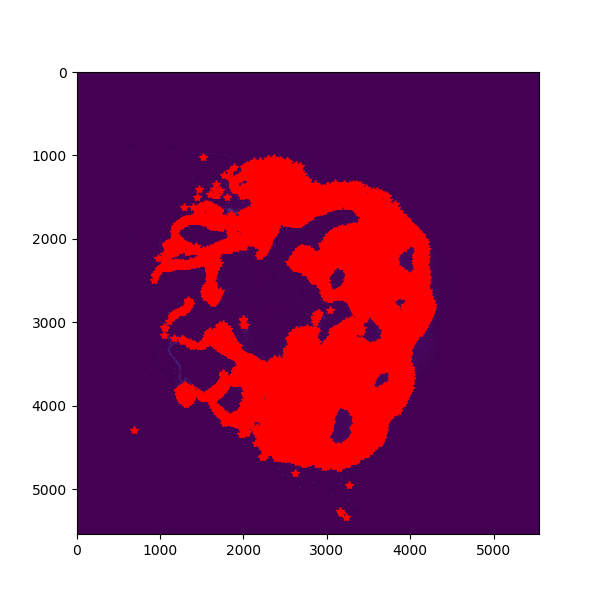

In [111]:
# Show detections overlay
plt.figure(figsize=(6, 6))
plot.zprojection(syto_zarr, centers, zlim=[400, 405])

# Show SOX2, TBR1, DNs on each channel

In [143]:
celltype_path = 'nuclei_fluorescence/nuclei_gating.npy'

celltype_labels = np.load(os.path.join(working_dir, celltype_path))
celltype_labels.shape

(2173528, 2)

SOX2 cells

In [144]:
sox2_path = 'sox2.zarr'

sox2_zarr = io.open(os.path.join(working_dir, sox2_path))
sox2_zarr.shape

(1500, 3799, 3799)

In [145]:
sox2_idx = np.where(celltype_labels[:, 0])[0]

sox2_centers = centers[sox2_idx]
sox2_centers.shape

(923565, 3)

<IPython.core.display.Javascript object>


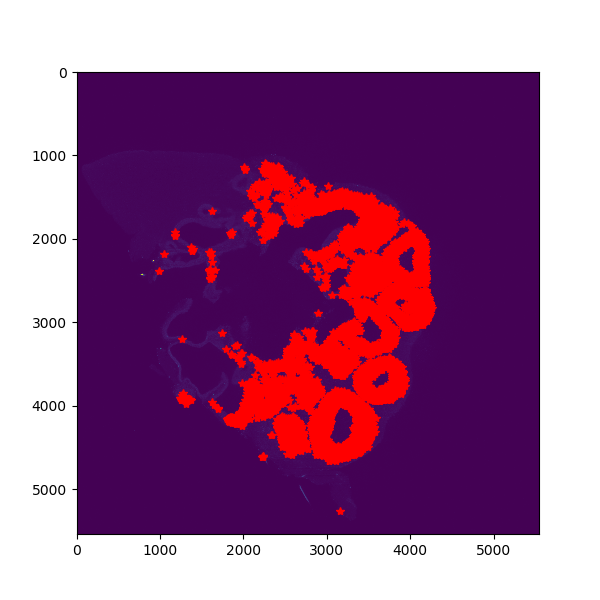

In [115]:
# Show detections overlay
plt.figure(figsize=(6, 6))
plot.zprojection(sox2_zarr, sox2_centers, zlim=[400, 405], clim=[0, 0.1])

TBR1 cells

In [146]:
tbr1_path = 'tbr1.zarr'

tbr1_zarr = io.open(os.path.join(working_dir, tbr1_path))
tbr1_zarr.shape

(1500, 3799, 3799)

In [147]:
tbr1_idx = np.where(celltype_labels[:, 1])[0]

tbr1_centers = centers[tbr1_idx]
tbr1_centers.shape

(364831, 3)

<IPython.core.display.Javascript object>


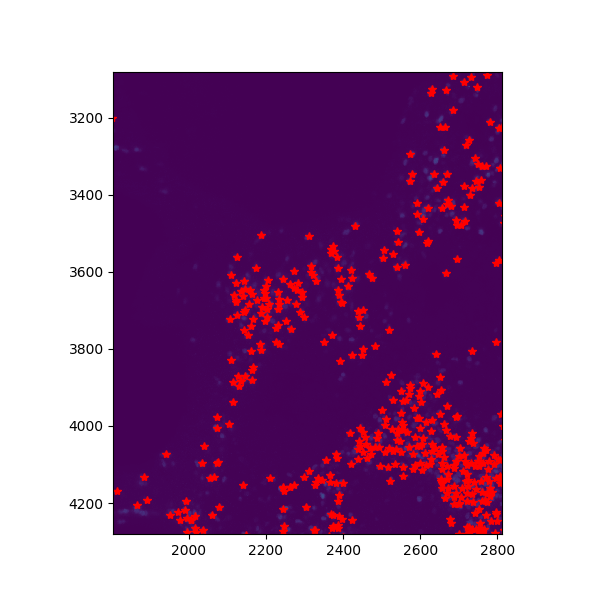

In [118]:
# Show detections overlay
plt.figure(figsize=(6, 6))
plot.zprojection(tbr1_zarr, tbr1_centers, zlim=[400, 405], clim=[0, 0.1])

DN cells

In [148]:
dn_idx = np.where(np.logical_and(celltype_labels[:, 0] == 0, celltype_labels[:, 1] == 0))[0]

dn_centers = centers[dn_idx]
dn_centers.shape

(901257, 3)

In [ ]:
# Show detections overlay
plt.figure(figsize=(6, 6))
plot.zprojection(syto_zarr, dn_centers, zlim=[400, 405])

# Show DN segregation by niche analysis

In [135]:
niche_labels = np.load(os.path.join(working_dir, 'niche_labels.npy'))
niche_labels.shape

(8821701,)

The "core" niche

In [136]:
core_idx = np.where(niche_labels == 0)[0]
core_centers = centers[core_idx]

core_centers.shape

(1947482, 3)

<IPython.core.display.Javascript object>


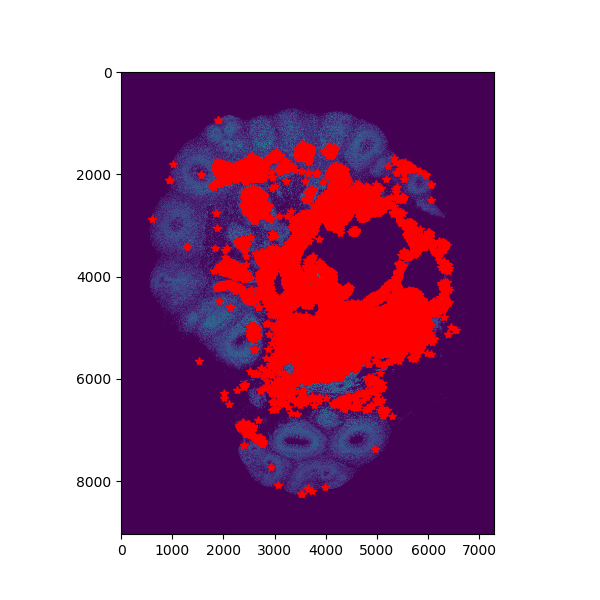

In [137]:
# Show detections overlay
plt.figure(figsize=(6, 6))
plot.zprojection(syto_zarr, core_centers, zlim=[400, 405])

This seems to corespond to the non-ventricle regions, not necessarily a necrotic core but a different lineage that emerged.

The "intermediates"

In [138]:
inter_idx = np.where(niche_labels == 4)[0]
inter_centers = centers[inter_idx]

inter_centers.shape

(3697429, 3)

<IPython.core.display.Javascript object>


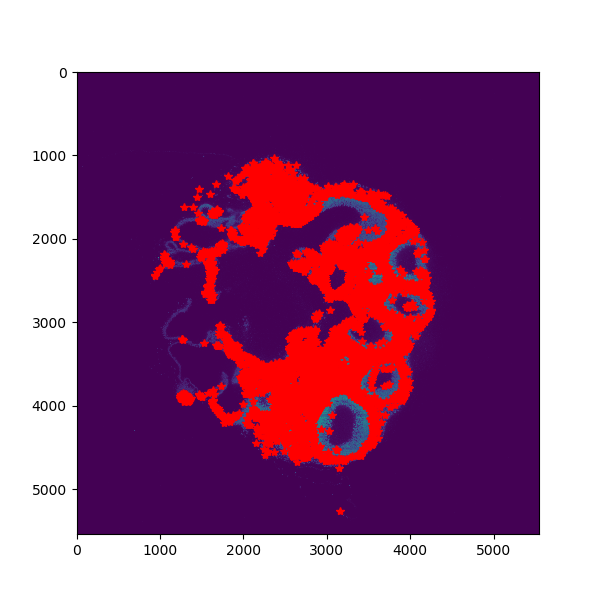

In [124]:
# Show detections overlay
plt.figure(figsize=(6, 6))
plot.zprojection(syto_zarr, inter_centers, zlim=[400, 405])

Look at DNs in the top right niche

In [139]:
topright_idx = np.where(niche_labels == 3)[0]
topright_centers = centers[topright_idx]
topright_celltypes = celltype_labels[topright_idx]
topright_dn_idx = np.where(np.logical_and(topright_celltypes[:, 0] == 0, topright_celltypes[:, 1] == 0))[0]
topright_dn_centers = topright_centers[topright_dn_idx]

topright_dn_centers.shape

(17, 3)

<IPython.core.display.Javascript object>


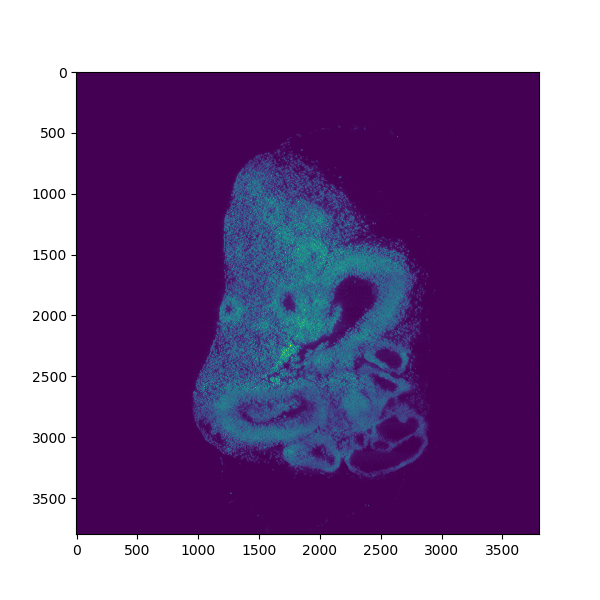

In [82]:
# Show detections overlay
plt.figure(figsize=(6, 6))
plot.zprojection(syto_zarr, topright_dn_centers, zlim=[600, 605])